In [7]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
#print(plt.style.available)
plt.style.use('ggplot')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Example of **Unsupervised Learning**

In [9]:
x, y = make_blobs(n_samples=100, centers=4,
random_state=500, cluster_std=1.25)

In [10]:
model = KMeans(n_clusters=4, random_state=0)

In [11]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [12]:
y_ = model.predict(x)
y_


array([1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 3, 1, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1,
       0, 3, 0, 0, 2, 2, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 3, 3, 0, 2, 2,
       1, 0, 3, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 3, 2, 1, 0, 2, 1, 3, 1, 2,
       0, 0, 0, 3, 1, 0, 3, 2, 3, 1, 3, 2, 3, 3, 0, 1, 0, 1, 3, 3, 1, 3,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2], dtype=int32)

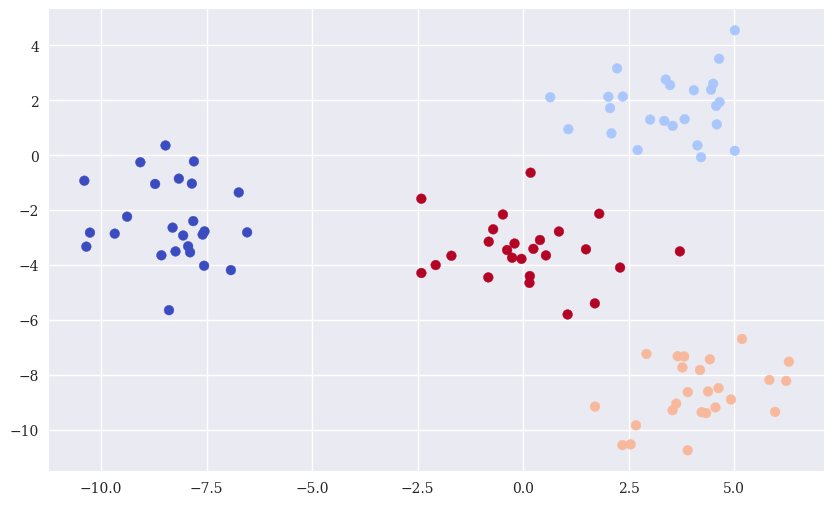

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_, cmap='coolwarm');

**Reinforcement Learning**

*Baseline algorythm*

In [13]:
ssp = [1, 1, 1, 1, 0]

In [14]:
asp = [1, 0]

In [15]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [16]:
rl = np.array([epoch() for _ in range(15)])
rl

array([45, 46, 50, 48, 54, 53, 55, 56, 49, 55, 38, 53, 50, 53, 48])

In [17]:
rl.mean()

np.float64(50.2)

Reinforcement learning

In [18]:
ssp = [1, 1, 1, 1, 0]

In [19]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [20]:
rl = np.array([epoch() for _ in range(15)])
rl

array([66, 57, 61, 70, 61, 70, 67, 79, 73, 72, 70, 66, 63, 59, 73])

In [21]:
rl.mean()

np.float64(67.13333333333334)

**Neural Networks**

Definition of function f


In [22]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3
    

In [23]:
x = np.linspace (-2, 4, 25)
x


array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [24]:
y = f(x)
y


array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

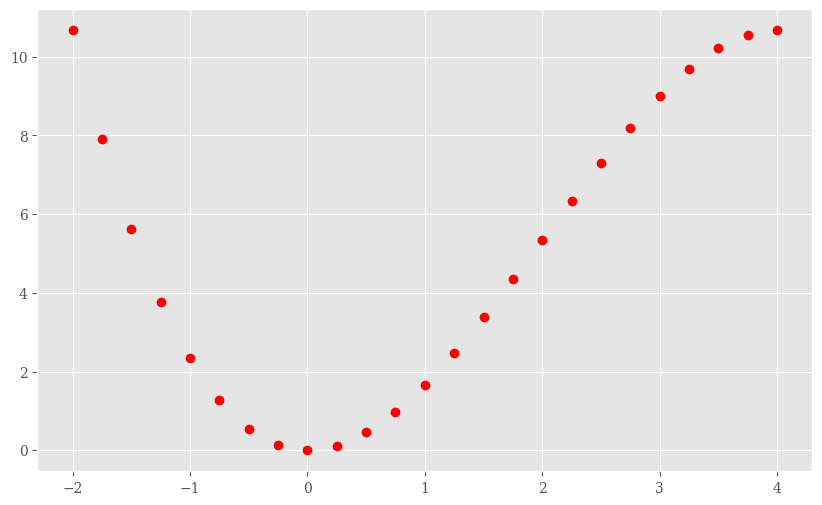

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro');

*OLS Regression*

*Linear approximation*
   
y = $\alpha$ + $\beta$ x

In [26]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

np.float64(1.0541666666666667)

In [27]:
alpha = y.mean() - beta * x.mean()
alpha

np.float64(3.8625000000000003)

In [28]:
y_ = alpha + beta * x

Mean sqared error

In [29]:
MSE = ((y - y_) ** 2).mean()
MSE

np.float64(10.721953125)

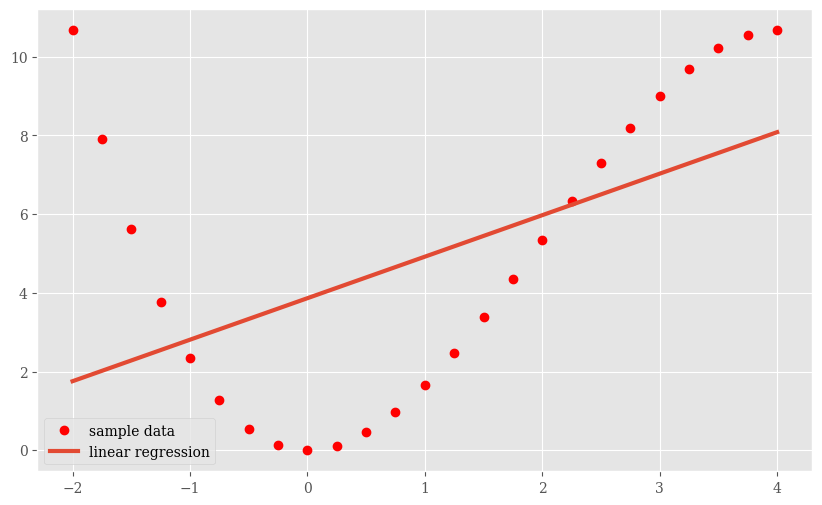

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

deg=1 | MSE=10.721953125 | [1.0542 3.8625]
deg=2 | MSE=2.312578125 | [ 1.     -0.9458  1.6125]
deg=3 | MSE=1.038756882155994e-28 | [-0.3333  2.      0.     -0.    ]
deg=4 | MSE=1.6267343855958664e-29 | [ 0.     -0.3333  2.      0.     -0.    ]
deg=5 | MSE=1.7880470421754346e-29 | [ 0.     -0.     -0.3333  2.      0.      0.    ]


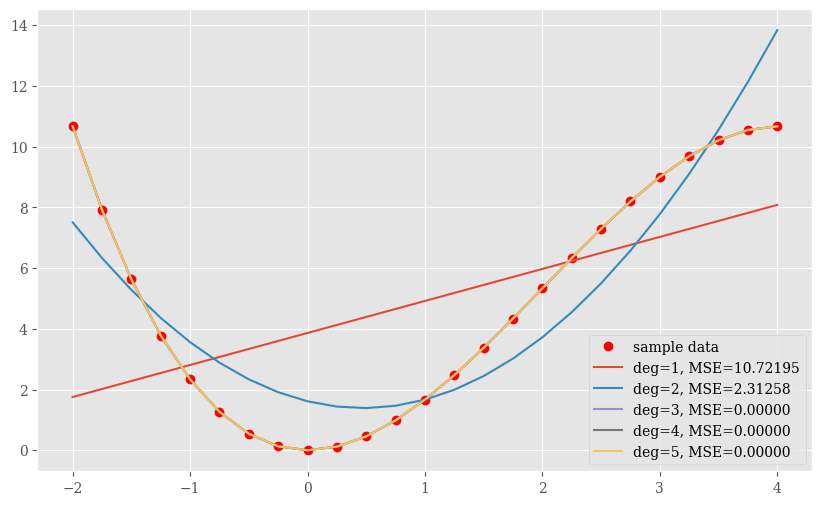

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3, 4, 5]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE} | {reg}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}, MSE={MSE:.5f}')
plt.legend();


*Estimation with Neural Networks* 

In [32]:
from sklearn.neural_network import MLPRegressor

In [33]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

In [34]:
model.fit(x.reshape(-1,1),y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [35]:
y_ = model.predict(x.reshape(-1,1))

In [36]:
MSE= ((y -y_) ** 2).mean()
MSE


np.float64(0.011389111262705191)

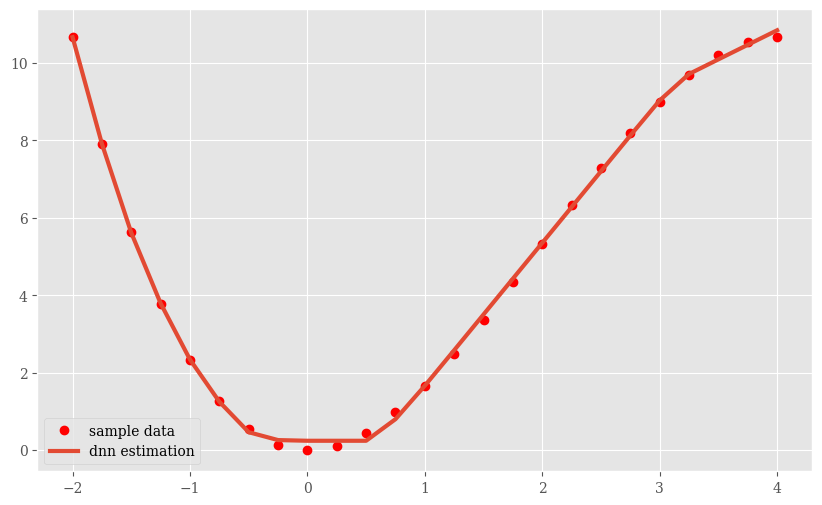

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

Keras

In [44]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [42]:
from keras.layers import Dense
from keras.models import Sequential

ModuleNotFoundError: No module named 'keras'

In [45]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

NameError: name 'Sequential' is not defined

In [ ]:
((y - y_) ** 2).mean()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();